# Q. 21-30

In [2]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Q.21. ヒストグラム正規化
要はLook up tableなのでtableを作ってcv2.LUTに渡せば良い。本末転倒な気もするがまずcv2.LUTでコントラストが半分で，最小値が10, 最大値が137に相当する画像を作る

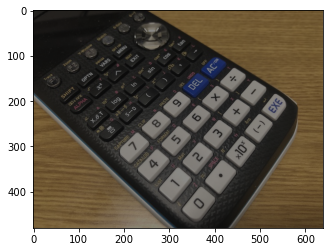

In [14]:
cimg = cv2.imread('Calc.jpg')
table = np.zeros((1,256))
table[0, :] = np.linspace(0,0.5,256)
lowimg = cv2.LUT(cimg, table).astype(np.float32)+10.0/255
plt.imshow(cv2.cvtColor(lowimg, cv2.COLOR_BGR2RGB))
lowimgu8 = np.uint8(lowimg*255)

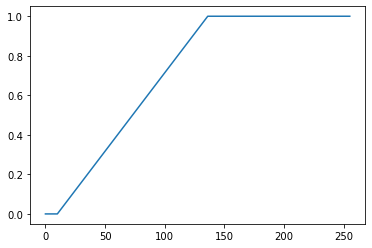

In [19]:
a = 0
b = 255
c = 10
d = 137
table2 = np.zeros((1,256))
table2[0, 0:c] = 0 #実際は不要
table2[0, c:d] = np.linspace(0, 1, d-c)
table2[0, d:] = 1.0
plt.plot(table2[0,:])

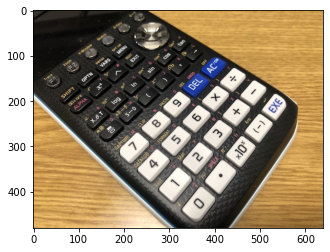

In [24]:
dst = cv2.LUT(lowimgu8, table2).astype(np.float32)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

## Q.22. ヒストグラム操作
ヒストグラム操作というか画像全体の演算。普通にnumpyだけで十分か。さっきのlowimgu8を使う。割と問題の数値が無茶苦茶で飽和するので対策が必要。

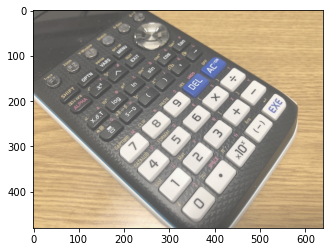

In [29]:
dst = 52.0*lowimgu8/lowimgu8.std()
dst = dst - lowimgu8.mean() + 128
dst[dst>255] = 255
plt.imshow(cv2.cvtColor(dst.astype(np.uint8), cv2.COLOR_BGR2RGB))

## Q.23. ヒストグラム平坦化
Histogram equalization。これは流石にOpenCVに実装されているが1チャネルのみ。というかカラーで平坦化は好手ではない。これもlowimgu8を使う

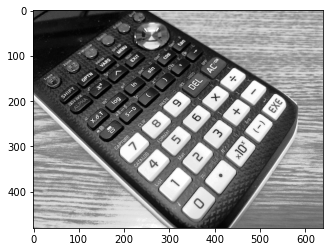

In [34]:
dst = cv2.equalizeHist(lowimgu8[:,:,1])
plt.imshow(dst, cmap='gray')

## Q.23. ガンマ補正
cv2.LUTで補正する。昔はカメラのガンマを考慮して補正後の画像を処理に使うのが常識だったが今は誰も気にしてないような。

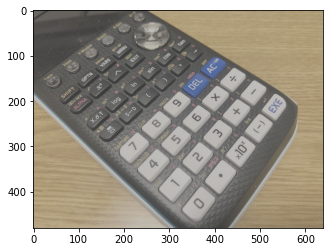

In [39]:
i = np.linspace(0,1,256)
gamma = 2.2
table = np.power(i, 1/gamma)*255
dst = cv2.LUT(lowimgu8, table).astype(np.uint8)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))


## Q.25. 最近傍補間でリサイズ
cv2.resizeを使う。n倍したいときはdsizeはNoneにしてfx,fyにnを入れる。NEARESTで1.5倍だとわからないので適当に狭い範囲を拾って4倍

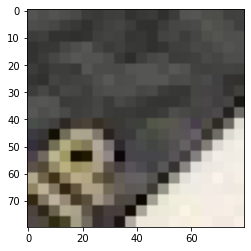

In [44]:
cimg = cv2.imread('Calc.jpg')
cimg = cimg[230:250,240:260]
h, w, c = cimg.shape
dst = cv2.resize(cimg, None, fx=4, fy=4, interpolation=cv2.INTER_NEAREST)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))


## Q.26. Bi-linear補間
これも25と同様。

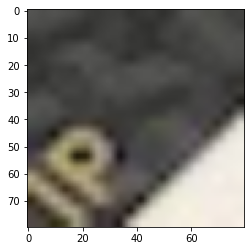

In [49]:
cimg = cv2.imread('Calc.jpg')
cimg = cimg[230:250,240:260]
h, w, c = cimg.shape
dst = cv2.resize(cimg, None, fx=4, fy=4, interpolation=cv2.INTER_LINEAR)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))


## Q.27. Bi-cubic補間

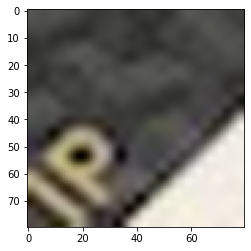

In [54]:
cimg = cv2.imread('Calc.jpg')
cimg = cimg[230:250,240:260]
h, w, c = cimg.shape
dst = cv2.resize(cimg, None, fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))


## Q.28. アフィン変換 (移動)
OpenCVではアフィン行列を使ってwarpAffineで変換できるが，getAffineTransformに移動前後の3座標を渡すとそれも省略できる。

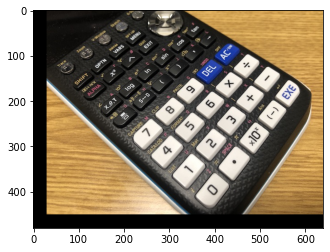

In [58]:
cimg = cv2.imread('Calc.jpg')
srcax = np.float32([[0.0, 0.0],[1.0, 0.0],[0.0,1.0]])
dstax = np.float32(srcax + [30.0,-30.0])
tr = cv2.getAffineTransform(srcax, dstax)
dst = cv2.warpAffine(cimg, tr, (cimg.shape[1], cimg.shape[0]))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

## Q.29. アフィン変換(拡大縮小)
これも移動後の座標を拡大縮小すれば良い。

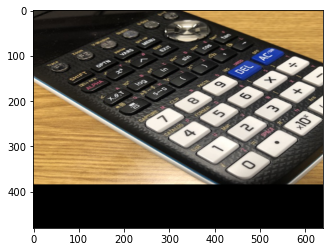

In [68]:
cimg = cv2.imread('Calc.jpg')
srcax = np.float32([[0.0, 0.0],[1.0, 0.0],[0.0,1.0]])
dstax = srcax.copy()
dstax[:, 0] *= 1.3
dstax[:, 1] *= 0.8
tr = cv2.getAffineTransform(srcax, dstax)
dst = cv2.warpAffine(cimg, tr, (cimg.shape[1], cimg.shape[0]))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

複合は結果から見て移動が先らしい

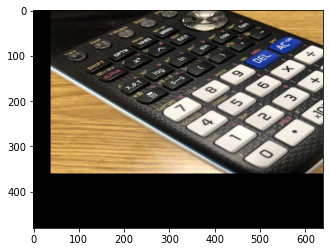

In [69]:
cimg = cv2.imread('Calc.jpg')
srcax = np.float32([[0.0, 0.0],[1.0, 0.0],[0.0,1.0]])
dstax = srcax.copy()
dstax += [30.0,-30.0]
dstax[:, 0] *= 1.3
dstax[:, 1] *= 0.8
tr = cv2.getAffineTransform(srcax, dstax)
dst = cv2.warpAffine(cimg, tr, (cimg.shape[1], cimg.shape[0]))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

## Q.30. アフィン変換(回転)
OpenCVの回転はgetRotationMatrix2Dでアフィン行列が貰える。centerが指定できるので面倒なことは起きない。

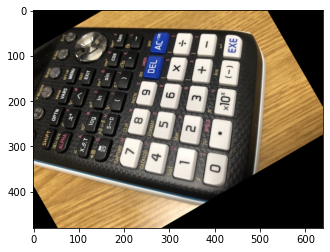

In [70]:
cimg = cv2.imread('Calc.jpg')
center = (cimg.shape[0]/2, cimg.shape[1]/2)
angle = 30.0
scale = 1.0
tr = cv2.getRotationMatrix2D(center, angle, scale)
dst = cv2.warpAffine(cimg, tr, (cimg.shape[1], cimg.shape[0]))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))